In [1]:
from datetime import datetime

import matplotlib.pyplot as plt

from prediction.data import vessel_groups
from prediction.preprocessing import load_and_build, remove_outliers_parallel
from prediction.visualization import plot_north_america, plot_trajectories


In [2]:
groups = vessel_groups()
trajectories = load_and_build(datetime(2024, 1, 1), datetime(2024, 1, 10), 100, groups, verbose=True)

Loading and building trajectories for 10 days using 11 processes
Loading and building trajectories for 2024-01-05 00:00:00
Loading and building trajectories for 2024-01-08 00:00:00
Loading and building trajectories for 2024-01-07 00:00:00
Loading and building trajectories for 2024-01-09 00:00:00
Loading and building trajectories for 2024-01-04 00:00:00
Loading and building trajectories for 2024-01-03 00:00:00
Loading and building trajectories for 2024-01-01 00:00:00
Loading and building trajectories for 2024-01-10 00:00:00
Loading and building trajectories for 2024-01-02 00:00:00
Loading and building trajectories for 2024-01-06 00:00:00


100%|██████████| 14825/14825 [04:27<00:00, 55.42it/s] 


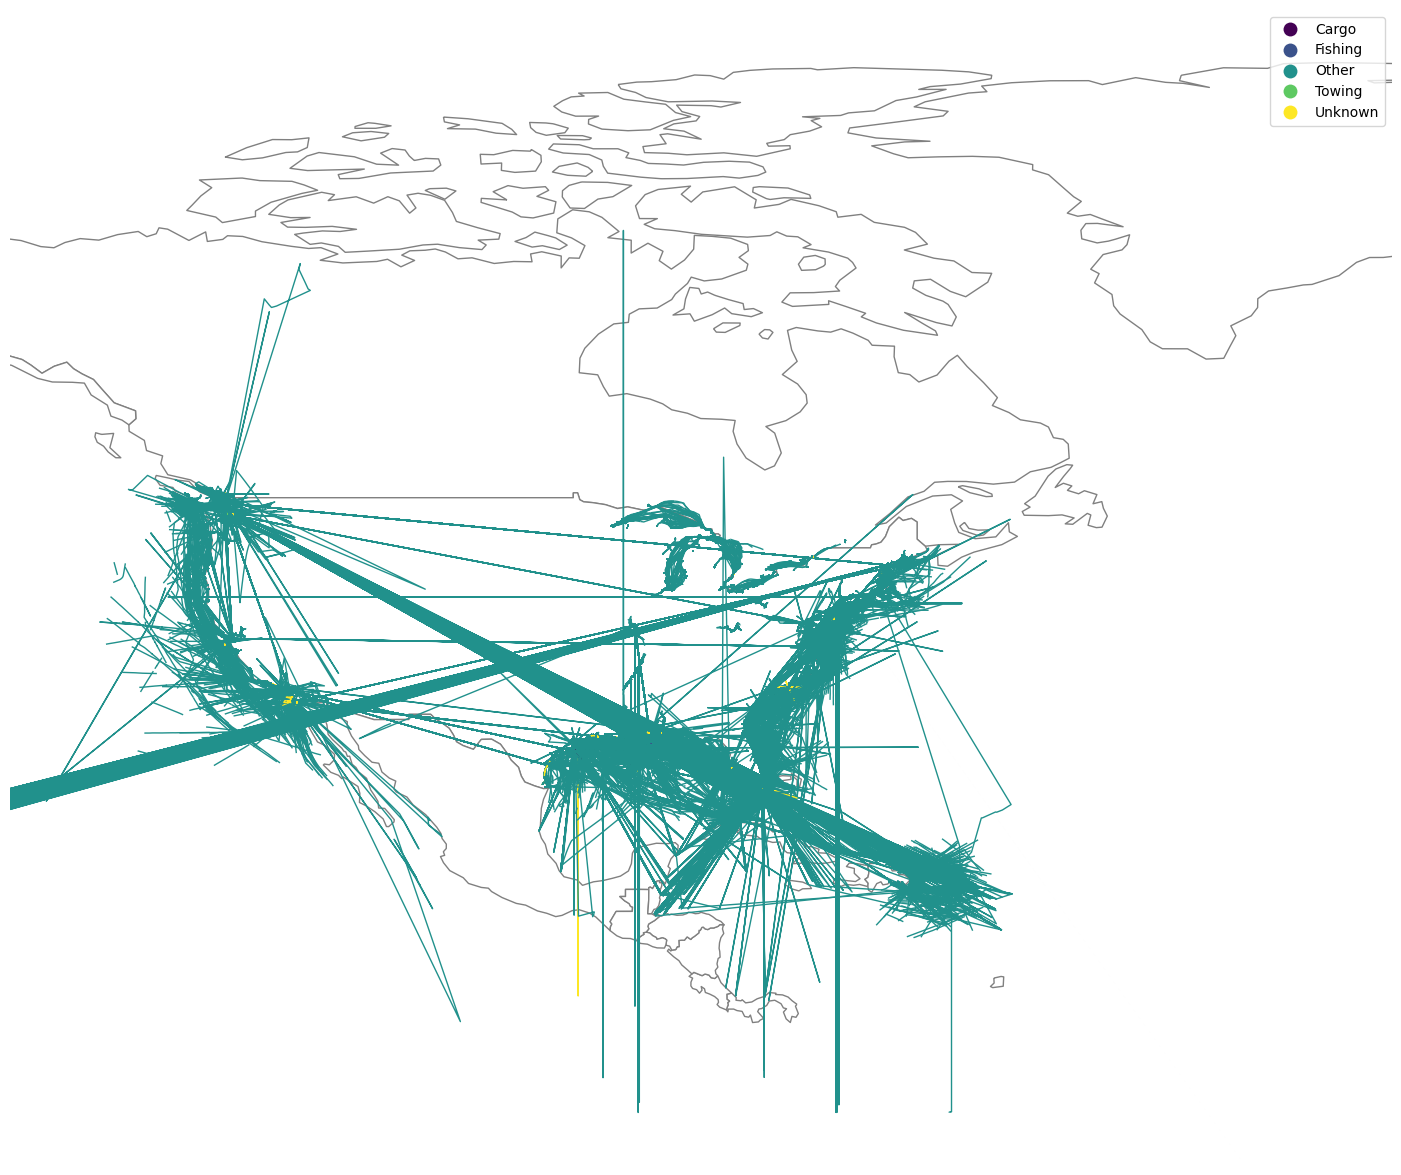

In [3]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
plot_north_america(ax)
plot_trajectories(trajectories, ax)

# cut axes to north america
ax.set_xlim(-140, -30)

plt.show()

In [4]:
trajectories_new = trajectories.copy()

In [5]:

trajectories_new = remove_outliers_parallel(
    trajectories_new, threshold_partition=5.0, threshold_association=15.0, threshold_completeness=100.0
)

Processing with 11 processes...


100%|██████████| 10937/10937 [02:25<00:00, 75.28it/s] 


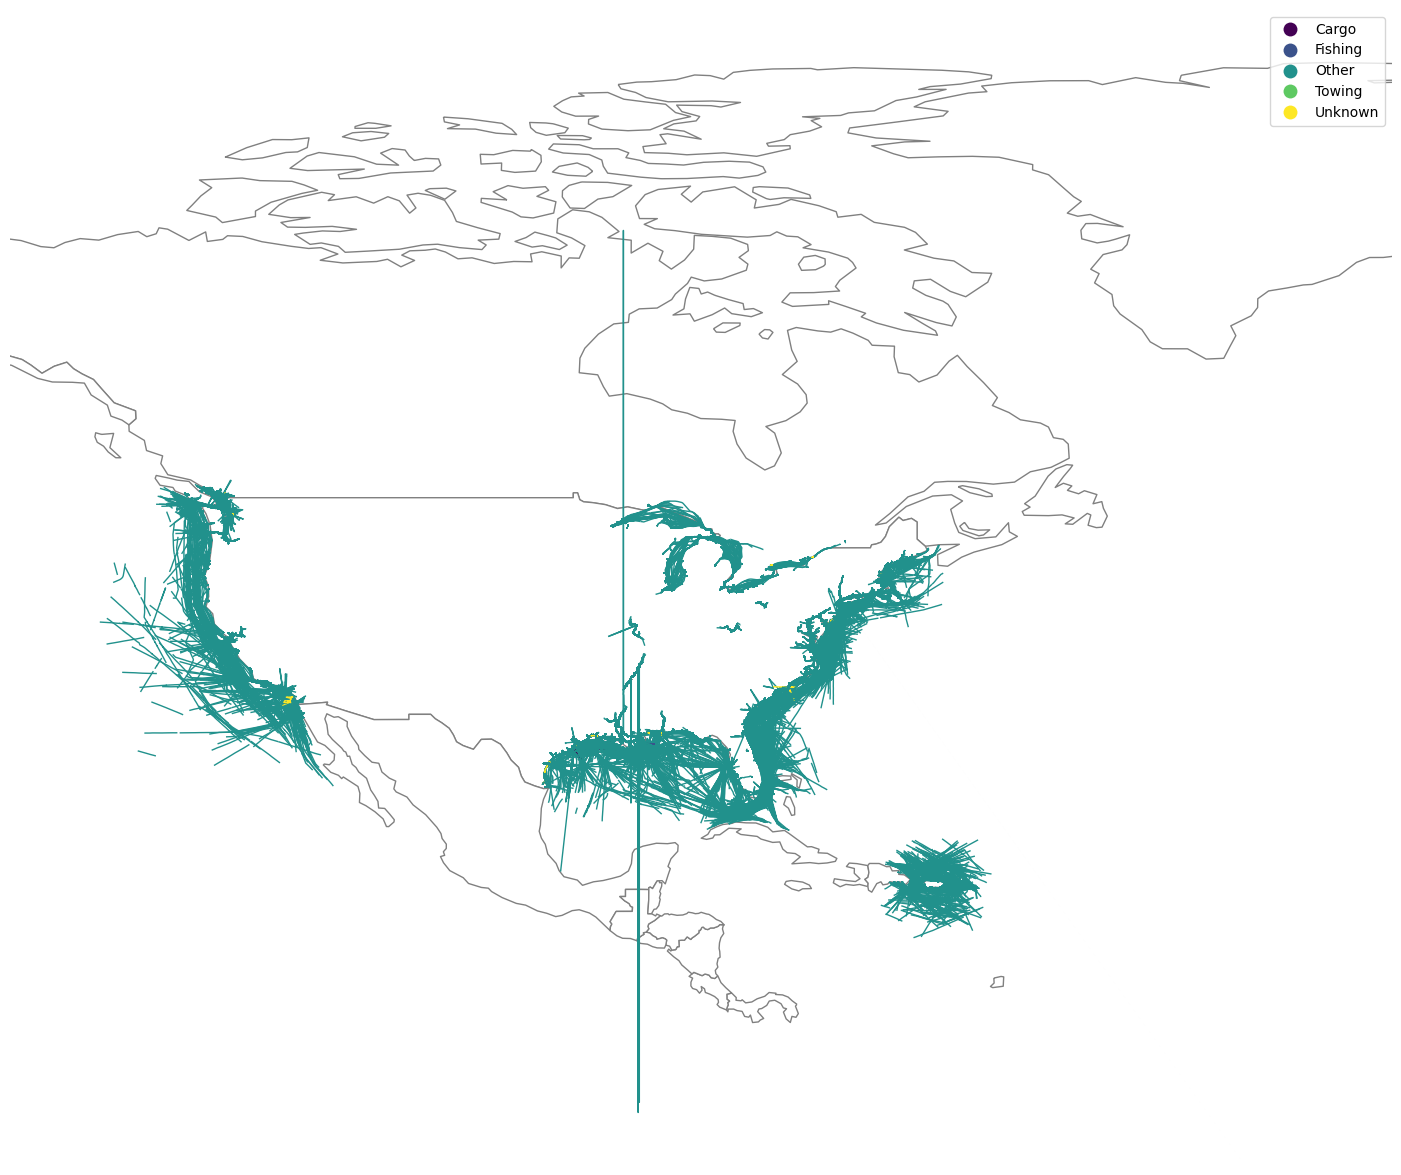

In [6]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
plot_north_america(ax)
plot_trajectories(trajectories_new, ax)

# cut axes to north america
ax.set_xlim(-140, -30)

plt.show()